In [ ]:
import pandas as pd
import os

# --- 1. Define modality-feature pairs ---
tupsVarNames = [
    ("bodybattery", 'bodyBattery'),
    ('wellness', 'steps'),
    ('stresslevels','stressScore'),
    ('heartratereadings','beatsPerMinute'),
    ('wellness', 'activityType')
]

# --- 2. Load Parquet files created by toyRetrieve ---
# Expected file pattern: "Toy_<collection>_toy.parquet"
parquet_dfs = []

for collection, feature in tupsVarNames:
    fname = f"Toy_{collection}_toy.parquet"
    if os.path.exists(fname):
        df = pd.read_parquet(fname)
        df['modality'] = feature  # Attach modality/feature name for downstream use
        df['collection'] = collection  # Track source collection if needed
        parquet_dfs.append(df)
        print(f"Loaded {fname} with shape {df.shape}")
    else:
        print(f"File {fname} not found")

# Combine all into one DataFrame if needed
if parquet_dfs:
    df_all = pd.concat(parquet_dfs, ignore_index=True)
    print("Combined DataFrame shape:", df_all.shape)
else:
    print("No Parquet files loaded.")

# --- 3. Placeholder for feature extraction logic ---
# Feature sets to extract:
# - Hourly Steps: Total steps taken per hour
# - Hourly ENMO (mg): Euclidean Norm Minus One per hour
# - Steps Cadence: Steps per minute during active walking
# - Mean Cadence: Mean steps/min
# - Cadence Std Dev: Standard deviation of cadence
# - Cadence Percentiles: 25th, 50th (median), 75th
# - Cadence ENMO: ENMO of cadence
# - Physical Activity Proportions: Light, Sedentary, Moderate-Vigorous

# --- 4. Filter step rate and compute daily steps from wellness raw data ---
def filterStepRate(welnessdf, activity='WALKING', rate=150):
    verbose = True
    # Filter for activityType
    act = welnessdf[welnessdf['activityType'] == activity].copy()

    # Convert startTime to datetime
    act['startTime'] = pd.to_datetime(act['startTime'], format='%Y-%m-%d %H:%M:%S')

    # Compute step rate (steps per minute)
    act['stepRate'] = act['steps'] / act['elapsedTime'] * 60

    # Filter out records with unrealistic step rate
    act = act[act['stepRate'] < rate]

    # Extract date from timestamp and compute daily steps
    act['date'] = act['startTime'].dt.date
    stepsDay = act.groupby('date')['steps'].sum()

    if verbose:
        for date, steps in stepsDay.items():
            print(f"Date: {date}, Steps per day: {steps}")

    return stepsDay

# --- 5. Extract features from wellness raw data ---
try:
    wellness_df = pd.read_csv("Toy_wellness_toy.csv")
    print("Loaded wellness CSV with shape:", wellness_df.shape)

    # Convert startTime to datetime
    wellness_df['startTime'] = pd.to_datetime(wellness_df['startTime'])

    # Compute step rate and apply threshold filter
    filtered = wellness_df[wellness_df['activityType'] == 'WALKING'].copy()
    filtered['stepRate'] = filtered['steps'] / filtered['elapsedTime'] * 60
    filtered = filtered[filtered['stepRate'] < 150]

    # Create hour column
    filtered['hour'] = filtered['startTime'].dt.floor('H')

    # Hourly steps
    hourly_steps = filtered.groupby(['patientid', 'hour'])['steps'].sum().reset_index()
    hourly_steps.rename(columns={'steps': 'hourly_steps'}, inplace=True)

    print("Hourly steps calculated:")
    print(hourly_steps.head())

except Exception as e:
    print("Failed to extract wellness features:", str(e))


Loaded Toy_bodybattery_toy.parquet with shape (1000, 5)
Loaded Toy_wellness_toy.parquet with shape (1000, 16)
Loaded Toy_stresslevels_toy.parquet with shape (1000, 5)
Loaded Toy_heartratereadings_toy.parquet with shape (1000, 5)
Loaded Toy_wellness_toy.parquet with shape (1000, 16)
Combined DataFrame shape: (5000, 20)
Loaded wellness CSV with shape: (1000, 14)
Hourly steps calculated:
  patientid                hour  hourly_steps
0  p1020005 2024-12-06 15:00:00            13
1  p1020005 2024-12-14 19:00:00            28
2  p1020005 2025-03-02 18:00:00            13
3  p1020008 2024-12-13 10:00:00            19
4  p1020011 2025-05-09 06:00:00            40


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31276\2894204808.py:85: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered['hour'] = filtered['startTime'].dt.floor('H')


Loaded Toy_bodybattery_toy.parquet with shape (1000, 5)
Loaded Toy_wellness_toy.parquet with shape (1000, 16)
Loaded Toy_stresslevels_toy.parquet with shape (1000, 5)
Loaded Toy_heartratereadings_toy.parquet with shape (1000, 5)
Loaded Toy_wellness_toy.parquet with shape (1000, 16)
Combined DataFrame shape: (5000, 20)
Loaded wellness CSV with shape: (1000, 14)
Hourly steps calculated:
  patientid                hour  hourly_steps
0  p1020005 2024-12-06 15:00:00            13
1  p1020005 2024-12-14 19:00:00            28
2  p1020005 2025-03-02 18:00:00            13
3  p1020008 2024-12-13 10:00:00            19
4  p1020011 2025-05-09 06:00:00            40


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31276\2894204808.py:85: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered['hour'] = filtered['startTime'].dt.floor('H')


In [ ]:

# --- 2. Load Parquet files created by toyRetrieve ---
# Expected file pattern: "Toy_<collection>_toy.parquet"
parquet_dfs = []

for collection, feature in tupsVarNames:
    fname = f"Toy_{collection}_toy.parquet"
    if os.path.exists(fname):
        df = pd.read_parquet(fname)
        df['modality'] = feature  # Attach modality/feature name for downstream use
        df['collection'] = collection  # Track source collection if needed
        parquet_dfs.append(df)
        print(f"Loaded {fname} with shape {df.shape}")
    else:
        print(f"File {fname} not found")

# Combine all into one DataFrame if needed
if parquet_dfs:
    df_all = pd.concat(parquet_dfs, ignore_index=True)
    print("Combined DataFrame shape:", df_all.shape)
else:
    print("No Parquet files loaded.")

# --- 3. Placeholder for feature extraction logic ---
# Feature sets to extract:
# - Hourly Steps: Total steps taken per hour
# - Hourly ENMO (mg): Euclidean Norm Minus One per hour
# - Steps Cadence: Steps per minute during active walking
# - Mean Cadence: Mean steps/min
# - Cadence Std Dev: Standard deviation of cadence
# - Cadence Percentiles: 25th, 50th (median), 75th
# - Cadence ENMO: ENMO of cadence
# - Physical Activity Proportions: Light, Sedentary, Moderate-Vigorous

# --- 4. Filter step rate and compute daily steps from wellness raw data ---
def filterStepRate(welnessdf, activity='WALKING', rate=150):
    verbose = True
    # Filter for activityType
    act = welnessdf[welnessdf['activityType'] == activity].copy()

    # Convert startTime to datetime
    act['startTime'] = pd.to_datetime(act['startTime'], format='%Y-%m-%d %H:%M:%S')

    # Compute step rate (steps per minute)
    act['stepRate'] = act['steps'] / act['elapsedTime'] * 60

    # Filter out records with unrealistic step rate
    act = act[act['stepRate'] < rate]

    # Extract date from timestamp and compute daily steps
    act['date'] = act['startTime'].dt.date
    stepsDay = act.groupby('date')['steps'].sum()

    if verbose:
        for date, steps in stepsDay.items():
            print(f"Date: {date}, Steps per day: {steps}")

    return stepsDay

# --- 5. Extract features from wellness raw data ---
try:
    wellness_df = pd.read_csv("Toy_wellness_toy.csv")
    print("Loaded wellness CSV with shape:", wellness_df.shape)

    # Convert startTime to datetime
    wellness_df['startTime'] = pd.to_datetime(wellness_df['startTime'])

    # Compute step rate and apply threshold filter
    filtered = wellness_df[wellness_df['activityType'] == 'WALKING'].copy()
    filtered['stepRate'] = filtered['steps'] / filtered['elapsedTime'] * 60
    filtered = filtered[filtered['stepRate'] < 150]

    # Create hour column
    filtered['hour'] = filtered['startTime'].dt.floor('H')

    # Hourly steps
    hourly_steps = filtered.groupby(['patientid', 'hour'])['steps'].sum().reset_index()
    hourly_steps.rename(columns={'steps': 'hourly_steps'}, inplace=True)

    print("Hourly steps calculated:")
    print(hourly_steps.head())

except Exception as e:
    print("Failed to extract wellness features:", str(e))


In [ ]:
# --- 5. Preprocess hourly step counts for TSFRESH ---
def prepare_hourly_steps(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # Compute step rate and apply filter
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Aggregate steps to hourly bins
    walking['hour'] = walking['startTime'].dt.floor('H')
    hourly_steps = (
        walking.groupby(['patientid', 'hour'])['steps']
        .sum()
        .reset_index()
        .rename(columns={'patientid': 'id', 'hour': 'time', 'steps': 'value'})
    )
    return hourly_steps
# --- 6. Preprocess daily step counts for TSFRESH ---
def prepare_daily_steps(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # Compute step rate and apply filter
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Aggregate steps to daily bins
    walking['date'] = walking['startTime'].dt.floor('D')
    daily_steps = (
        walking.groupby(['patientid', 'date'])['steps']
        .sum()
        .reset_index()
        .rename(columns={'patientid': 'id', 'date': 'time', 'steps': 'value'})
    )
    return daily_steps

# --- 7. Preprocess daily walking time for TSFRESH ---
def prepare_daily_walking_time(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # Filter by step rate
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Group by patient and day and sum the elapsed walking time in minutes
    walking['date'] = walking['startTime'].dt.floor('D')
    daily_time = (
        walking.groupby(['patientid', 'date'])['elapsedTime']
        .sum()
        .reset_index()
    )
    daily_time['elapsedTime'] = daily_time['elapsedTime'] / 60  # convert to minutes
    daily_time = daily_time.rename(columns={'patientid': 'id', 'date': 'time', 'elapsedTime': 'value'})
    return daily_time
# --- 8. Preprocess daily sedentary behavior proportion for TSFRESH ---
def prepare_daily_sedentary_proportion(df):
    sedentary = df[(df['modality'] == 'steps') & (df['activityType'] == 'SEDENTARY')].copy()
    sedentary['startTime'] = pd.to_datetime(sedentary['startTime'])

    # Each record is 1 minute of sedentary behavior
    sedentary['date'] = sedentary['startTime'].dt.floor('D')
    sedentary_minutes = sedentary.groupby(['patientid', 'date']).size().reset_index(name='sedentary_minutes')

    # Total minutes in a day (assume maximum is 1440), we count total entries per day per patient
    daily_counts = df[(df['modality'] == 'steps')].copy()
    daily_counts['startTime'] = pd.to_datetime(daily_counts['startTime'])
    daily_counts['date'] = daily_counts['startTime'].dt.floor('D')
    total_minutes = daily_counts.groupby(['patientid', 'date']).size().reset_index(name='total_minutes')

    # Merge and compute proportion
    merged = pd.merge(sedentary_minutes, total_minutes, on=['patientid', 'date'], how='inner')
    merged['proportion'] = merged['sedentary_minutes'] / merged['total_minutes']

    result = merged.rename(columns={'patientid': 'id', 'date': 'time', 'proportion': 'value'})[['id', 'time', 'value']]
    return result

# Example usage:
hourly_steps_df = prepare_hourly_steps(df_all)
print("Prepared hourly steps for TSFRESH:")
print(hourly_steps_df.head())

daily_steps_df = prepare_daily_steps(df_all)
print("Prepared daily steps for TSFRESH:")
print(daily_steps_df.head())

daily_walking_time_df = prepare_daily_walking_time(df_all)
print("Prepared daily walking time for TSFRESH:")
print(daily_walking_time_df.head())

daily_sedentary_prop_df = prepare_daily_sedentary_proportion(df_all)
print("Prepared daily sedentary proportion for TSFRESH:")
print(daily_sedentary_prop_df.head())


Prepared hourly steps for TSFRESH:
         id                time  value
0  p1020005 2024-12-06 15:00:00   13.0
1  p1020005 2024-12-14 19:00:00   28.0
2  p1020005 2025-03-02 18:00:00   13.0
3  p1020008 2024-12-13 10:00:00   19.0
4  p1020011 2025-05-09 06:00:00   40.0
Prepared daily steps for TSFRESH:
         id       time  value
0  p1020005 2024-12-06   13.0
1  p1020005 2024-12-14   28.0
2  p1020005 2025-03-02   13.0
3  p1020008 2024-12-13   19.0
4  p1020011 2025-05-09   40.0
Prepared daily walking time for TSFRESH:
         id       time  value
0  p1020005 2024-12-06    1.0
1  p1020005 2024-12-14    1.0
2  p1020005 2025-03-02    1.0
3  p1020008 2024-12-13    1.0
4  p1020011 2025-05-09    1.0
Prepared daily sedentary proportion for TSFRESH:
         id       time  value
0  p1010001 2025-05-15    1.0
1  p1010002 2025-05-06    1.0
2  p1010002 2025-05-27    1.0
3  p1020001 2024-09-07    1.0
4  p1020001 2024-10-26    1.0


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31156\4145435554.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  walking['hour'] = walking['startTime'].dt.floor('H')


In [ ]:
# simple tsfresh- a lot of features
import tsfresh

from tsfresh.utilities.dataframe_functions import impute
extracted_features = tsfresh.extract_features(hourly_steps_df, column_id = "id", column_sort="time", column_value="value") #783 features
# impute(extracted_features)

Feature Extraction: 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]


In [ ]:
#some selected tsfresh features
# === DYNAMIC TSFresh SETTINGS ===
def get_fc_parameters(modality):
    if modality in ['steps_summary', 'steps_hourly', 'steps_daily', 'walking_time']:
        return {
            'sum_values': None,
            'mean': None,
            'variance': None,
            'standard_deviation': None,
            'linear_trend': [{"attr": attr} for attr in ['intercept', 'slope', 'rvalue']]
        }
    elif modality in ['physical_activity', 'sedentary_prop']:
        return {
            'mean': None,
            'median': None,
            'variance': None,
            'percentage_of_reoccurring_values_to_all_values': None
        }
    else: #let bdybattery, stresscore, bpm be processed like this
        return {
            'sum_values': None,
            'mean': None,
            'variance': None,
            'standard_deviation': None,
            'linear_trend': [{"attr": attr} for attr in ['intercept', 'slope', 'rvalue']]
        }
# example
modality = 'steps_hourly'
custom_fc_parameters = get_fc_parameters(modality)
extracted = extract_features(
        hourly_steps_df,
        column_id='id',
        column_sort='time',
        column_value="value"
        default_fc_parameters=custom_fc_parameters,
    )

In [ ]:
# load and align clinical data,
#  filter the patients selected for analysis
spats_csv = r"C:\Users\n.melanitis\Documents\GitHub\AllDayMetrics\Data-28-05-25\D32_corrected_patient_list_with_audit(in).xlsx"
rawp = pd.read_excel(spats_csv, header=None)
print(rawp.columns)
rawp = rawp[0].str.split(',', expand = True)
rawp.columns = rawp.iloc[0]
rawp = rawp[1:]
spat = rawp[['patientid', 'final_register_date']].copy()
spat['final_register_date'] = pd.to_datetime(
    spat['final_register_date']
                            )

# clinical data 
cdata_csv =r"C:\Users\n.melanitis\Documents\GitHub\AllDayMetrics\Data-28-05-25\pdpid_harmonized_data_UK_GR_NL_2025_05_02.csv"
rawc = pd.read_csv(cdata_csv)
# Normalize both to lowercase (as strings)
ids_to_match = rawp['patientid'].astype(str).str.lower()
study_ids = rawc['Study Subject ID'].astype(str).str.lower()
sclin =  rawc[study_ids.isin(ids_to_match)]
# So now I have filtered only the selected patients from the clinical data


Index([0], dtype='int64')


In [ ]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
# Clinical Targets- two weeks (analysis step one)

# start with grabbing DOC_FLARE column
targetn = 'DOC_FLARE'
# double check i dont get duplicates for a patient
# Visit Occurrence column 
visit = 'T0'

# what is AUTH using as targets? (check PLAN)

# give the two weeks of data IN FEATURE EXTRACTION, use select features/ check association with variable in AIp
# Step 2: Keep only patientids present in spat
df_wear = df_wear[df_wear['patientid'].isin(spat['patientid'])]

# Step 3: Merge wearables with registration dates
df_wear = df_wear.merge(spat, on='patientid')

# Step 4: Filter to 2 weeks after registration
df_wear = df_wear[
    (df_wear['timestamp'] >= df_wear['final_register_date']) &
    (df_wear['timestamp'] < df_wear['final_register_date'] + pd.Timedelta(weeks=2))
]

# Step 5: Prepare for tsfresh
df_wear = df_wear[['patientid', 'timestamp', 'value']].rename(columns={
    'patientid': 'id',
    'timestamp': 'time'
})

# Step 6: Extract features
features = extract_features(df_wear, column_id='id', column_sort='time')

# Step 7: Impute missing values using tsfresh
impute(features)

# Step 8: Prepare binary target
target = sclin[['patientid', 'target']].copy()
target = target.set_index('patientid')
target['target'] = target['target'].map({'yes': 1, 'no': 0})

# Step 9: Select relevant features
selected_features = select_features(features, target.loc[features.index, 'target'])


In [ ]:
df_all['modality'].unique()

array(['bodyBattery', 'steps', 'stressScore', 'beatsPerMinute',
       'activityType'], dtype=object)

In [22]:
# this cell has the full pipeline

# imports
import pandas as pd
import os
import glob
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from functools import reduce
from tsfresh.feature_extraction import ComprehensiveFCParameters

# definitions
# --- 1. Define modalities ---
tupsVarNames = [
    ("bodybattery", 'bodyBattery'),
    ('wellness', 'steps'),
    ('stresslevels','stressScore'),
    ('heartratereadings','beatsPerMinute')
]

# columns to keep (captured data-streams from mongoDB)
capturedData = [ 
    'timestamp', 'patientid', 'beatsPerMinute',
    'bodyBattery', 'activityType', 'steps',
       'stressScore', 'startTime', 'elapsedTime'
]
# patients to include in analysis
spats_csv = r"C:\Users\n.melanitis\Documents\GitHub\AllDayMetrics\Data-28-05-25\D32_corrected_patient_list_with_audit(in).xlsx"
cdata_csv =r"C:\Users\n.melanitis\Documents\GitHub\AllDayMetrics\Data-28-05-25\harmonized_prospective_UK_GR_NL_long_2025_06_13.csv"

# Target for feature selection- column name in clinical data
targetn = 'DOC_FLARE'

# Visit for target- for now this will be T0
visit = 'T0'

# Lit-features- FLAG if True i extract min max 1st and 2nd order diffs (features from lit)
litFLAG = False
if litFLAG:
    extraF = {
            "minimum": None,
            "maximum": None,
            "mean_change": None,
            "mean_abs_change": None,
            "change_quantiles": [
                {"ql": 0.0, "qh": 0.5, "isabs": True, "f_agg": "mean"}  # approximates 2nd-order diff
                ]
        #add the other selected features, extract for all modalities
        }

# fullFLAG- when full FLAG is ON, do full feature extraction and no feature selection
# This makes sense with tsfresh built in select_features: its independent hypothesis testing
# with multiple comparisons correction
fullFLAG = False

# functions
def readParts(name, ids_to_match, capturedData):
    # Pattern to match files like name_part0.parquet, name_part1.parquet, etc.
    pattern = f"{name}_part*.parquet"
    files = sorted(glob.glob(pattern))
    
    # Normalize capturedData column list
    keep_columns = set(capturedData)

    if not files:
        raise FileNotFoundError(f"No files matching pattern {pattern}")
    
    # Read and concatenate all matching parquet files
    dfs = []
    for f in files:
        df =pd.read_parquet(f)
        df = df[df['patientid'].isin(ids_to_match)]
        # Keep only columns that are in capturedData
        cols_to_keep = [col for col in df.columns if col in keep_columns]
        df = df[cols_to_keep]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# --- 4. Filter step rate and compute daily steps from wellness raw data ---
def filterStepRate(welnessdf, activity='WALKING', rate=150):
    verbose = True
    # Filter for activityType
    act = welnessdf[welnessdf['activityType'] == activity].copy()

    # Convert startTime to datetime
    act['startTime'] = pd.to_datetime(act['startTime'], format='%Y-%m-%d %H:%M:%S')

    # Compute step rate (steps per minute)
    act['stepRate'] = act['steps'] / act['elapsedTime'] * 60

    # Filter out records with unrealistic step rate
    act = act[act['stepRate'] < rate]

    # Extract date from timestamp and compute daily steps
    act['date'] = act['startTime'].dt.date
    stepsDay = act.groupby('date')['steps'].sum()

    if verbose:
        for date, steps in stepsDay.items():
            print(f"Date: {date}, Steps per day: {steps}")

    return stepsDay

# --- 5. Preprocess hourly step counts for TSFRESH ---
def prepare_hourly_steps(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # drop duplicate entries
    walking.drop_duplicates(subset=['patientid', 'startTime'], inplace=True)

    # Compute step rate and apply filter
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Aggregate steps to hourly bins
    walking['hour'] = walking['startTime'].dt.floor('H')
    hourly_steps = (
        walking.groupby(['patientid', 'hour'])['steps']
        .sum()
        .reset_index()
        .rename(columns={'patientid': 'id', 'hour': 'time', 'steps': 'value'})
    )
    return hourly_steps
# --- 6. Preprocess daily step counts for TSFRESH ---
def prepare_daily_steps(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # drop duplicate entries
    walking.drop_duplicates(subset=['patientid', 'startTime'], inplace=True)

    # Compute step rate and apply filter
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Aggregate steps to daily bins
    walking['date'] = walking['startTime'].dt.floor('D')
    daily_steps = (
        walking.groupby(['patientid', 'date'])['steps']
        .sum()
        .reset_index()
        .rename(columns={'patientid': 'id', 'date': 'time', 'steps': 'value'})
    )
    return daily_steps

# --- 7. Preprocess daily walking time for TSFRESH ---
def prepare_daily_walking_time(df, rate=150):
    walking = df[(df['modality'] == 'steps') & (df['activityType'] == 'WALKING')].copy()
    walking['startTime'] = pd.to_datetime(walking['startTime'])

    # drop duplicate entries
    walking.drop_duplicates(subset=['patientid', 'startTime'], inplace=True)

    # Filter by step rate
    walking['stepRate'] = walking['steps'] / walking['elapsedTime'] * 60
    walking = walking[walking['stepRate'] < rate]

    # Group by patient and day and sum the elapsed walking time in minutes
    walking['date'] = walking['startTime'].dt.floor('D')
    daily_time = (
        walking.groupby(['patientid', 'date'])['elapsedTime']
        .sum()
        .reset_index()
    )
    daily_time['elapsedTime'] = daily_time['elapsedTime'] / 60  # convert to minutes
    daily_time = daily_time.rename(columns={'patientid': 'id', 'date': 'time', 'elapsedTime': 'value'})
    return daily_time
# --- 8. Preprocess daily sedentary behavior proportion for TSFRESH ---
def prepare_daily_sedentary_proportion(df):
    sedentary = df[(df['modality'] == 'steps') & (df['activityType'] == 'SEDENTARY')].copy()
    sedentary['startTime'] = pd.to_datetime(sedentary['startTime'])

    # drop duplicate entries
    sedentary.drop_duplicates(subset=['patientid', 'startTime'], inplace=True)

    # Each record is 1 minute of sedentary behavior
    sedentary['date'] = sedentary['startTime'].dt.floor('D')
    sedentary_minutes = sedentary.groupby(['patientid', 'date']).size().reset_index(name='sedentary_minutes')

    # Total minutes in a day (assume maximum is 1440), we count total entries per day per patient
    daily_counts = df[(df['modality'] == 'steps')].copy()
    daily_counts['startTime'] = pd.to_datetime(daily_counts['startTime'])
    daily_counts['date'] = daily_counts['startTime'].dt.floor('D')
    total_minutes = daily_counts.groupby(['patientid', 'date']).size().reset_index(name='total_minutes')

    # Merge and compute proportion
    merged = pd.merge(sedentary_minutes, total_minutes, on=['patientid', 'date'], how='inner')
    merged['proportion'] = merged['sedentary_minutes'] / merged['total_minutes']

    result = merged.rename(columns={'patientid': 'id', 'date': 'time', 'proportion': 'value'})[['id', 'time', 'value']]
    return result

def get_fc_parameters(modality):
    if modality in ['steps_summary', 'steps_daily', 'walking_time']:
        return {
            'sum_values': None,
            'mean': None,
            'variance': None,
            'standard_deviation': None,
            'linear_trend': [{"attr": attr} for attr in ['intercept', 'slope', 'rvalue']]
        }
    elif modality in ['steps_hourly']:
            return {
            'mean': None,
            'variance': None,
            'standard_deviation': None,
            'linear_trend': [{"attr": attr} for attr in ['intercept', 'slope', 'rvalue']]
        }
    elif modality in ['physical_activity', 'sedentary_prop']:
        return {
            'mean': None,
            'median': None,
            'variance': None,
            'percentage_of_reoccurring_values_to_all_values': None
        }
    else: #let bdybattery, stresscore, bpm be processed like this
        return {
            'sum_values': None,
            'mean': None,
            'variance': None,
            'standard_deviation': None,
            'linear_trend': [{"attr": attr} for attr in ['intercept', 'slope', 'rvalue']]
        }


# data load

# selected patients
rawp = pd.read_excel(spats_csv, header=None)
rawp = rawp[0].str.split(',', expand = True)
rawp.columns = rawp.iloc[0]
rawp = rawp[1:]
spat = rawp[['patientid', 'final_register_date']].copy()
spat['final_register_date'] = pd.to_datetime(
    spat['final_register_date']
                            )
ids_to_match = rawp['patientid'].astype(str).str.lower()

# edit fstring accordingly (parquetfilenames)
parquet_dfs = []
for collection, feature in tupsVarNames:
    fname = f"Mar29_{collection}"
    df = readParts(fname, ids_to_match, capturedData)
    df['modality'] = feature  # Attach modality/feature name for downstream use
    df['collection'] = collection  # Track source collection if needed
    parquet_dfs.append(df)
    print(f"Loaded {fname} with shape {df.shape}")
    
# Combine all into one DataFrame 
# if parquet_dfs:
#     df_all = pd.concat(parquet_dfs, ignore_index=True)
#     print("Combined DataFrame shape:", df_all.shape)
# else:
#     print("No Parquet files loaded.")


# clinical data- filter selected patients
rawc = pd.read_csv(cdata_csv)
# Normalize both to lowercase (as strings)
study_ids = rawc['Study Subject ID'].astype(str).str.lower()
sclin =  rawc[study_ids.isin(ids_to_match)]


# first filter df_all to be within two weeks, then extract the deriv features 

for i, df in enumerate(parquet_dfs):
# Merge with registration dates
    df = df.merge(spat, on='patientid', how='inner')

    # Filter to 2-week window from registration
    try:
        df = df[
            (df['timestamp'] >= df['final_register_date']) &
            (df['timestamp'] < df['final_register_date'] + pd.Timedelta(weeks=2))
        ]
    except:
            df = df[
            (df['startTime'] >= df['final_register_date']) &
            (df['startTime'] < df['final_register_date'] + pd.Timedelta(weeks=2))
        ]
            

    parquet_dfs[i] = df  # Update in list    

# # Step 3: Merge wearables with registration dates
# df_all = df_all.merge(spat, on='patientid')

# # Step 4: Filter to 2 weeks after registration
# df_all = df_all[
#     (df_all['timestamp'] >= df_all['final_register_date']) &
#     (df_all['timestamp'] < df_all['final_register_date'] + pd.Timedelta(weeks=2))
# ]

# prepare data for tsfresh [where to put this Sh#t]
#these have id, time, value columns
hourly_steps_df = prepare_hourly_steps(parquet_dfs[1])
daily_steps_df = prepare_daily_steps(parquet_dfs[1])
daily_walking_time_df = prepare_daily_walking_time(parquet_dfs[1])
daily_sedentary_prop_df = prepare_daily_sedentary_proportion(parquet_dfs[1])

# extract features
# -- TODO: add steps cadence when active (?)
mname = ['steps_hourly',  # basic set of features
         'steps_daily', 
         'walking_time', 
         'sedentary_prop',
         'other',
         'other',
         'other']

efconfig = [('id','time', 'value'),
            ('id','time', 'value'),
            ('id','time', 'value'),
            ('id','time', 'value'),
            ('patientid', 'timestamp','bodyBattery'),
            ('patientid', 'timestamp','stressScore'),
            ('patientid', 'timestamp','beatsPerMinute')
            ]
data = [hourly_steps_df,
        daily_steps_df,
        daily_walking_time_df,
        daily_sedentary_prop_df,
        parquet_dfs[0],
        parquet_dfs[2],
        parquet_dfs[3]
        ]

flist=[]
for mod, cfg, dat in zip(mname, efconfig, data):
    modality = mod
    custom_fc_parameters = get_fc_parameters(modality)
    if litFLAG:
        custom_fc_parameters.update(extraF)
    if fullFLAG:
        custom_fc_parameters = ComprehensiveFCParameters()
    if cfg[2] == 'value': #rename 'value' column to more info name
        cfg = (cfg[0], cfg[1], mod)
        dat.rename(columns={'value':mod}, inplace=True)

    extracted = extract_features(
        dat,
        column_id=cfg[0],
        column_sort=cfg[1],
        column_value=cfg[2],
        default_fc_parameters=custom_fc_parameters,
    )
    flist.append(extracted)
for i in range(len(flist)):
    flist[i].index.name = 'patientid'  # or use 'id' — pick one and be consistent

# Step: Merge all extracted feature DataFrames on index
features = reduce(lambda left, right: left.join(right, how='outer'), flist)

# Step 3: Impute missing values
impute(features)

# Step : Prepare binary target
target = sclin[['Study Subject ID', targetn]].copy()

if targetn == 'DOC_FLARE':
    target[targetn] = target[targetn].map({'Yes': 1, 'No': 0})
    target = target[sclin['Visit Occurrence'] == visit]
    
target.rename(columns={'Study Subject ID':'patientid'}, inplace=True)
target['patientid'] = target['patientid'].str.lower()
target = target.set_index('patientid')

# Step 5 feature selection: Keep only targets with non-NaN values
valid_targets = target[target[targetn].notna()]

# Intersect indices of features and valid targets
common_ids = valid_targets.index.intersection(features.index)

# Align features and targets to common IDs
valid_features = features.loc[common_ids]
valid_targets = valid_targets.loc[common_ids, targetn]

# Select relevant features
selected_features = select_features(valid_features, valid_targets, ml_task="classification")


Loaded Mar29_bodybattery with shape (25449068, 5)
Loaded Mar29_wellness with shape (21430352, 7)
Loaded Mar29_stresslevels with shape (25689029, 5)
Loaded Mar29_heartratereadings with shape (27179359, 5)


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31316\1540301994.py:117: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  walking['hour'] = walking['startTime'].dt.floor('H')
Feature Extraction: 100%|██████████| 26/26 [00:02<00:00,  9.86it/s]


In [ ]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

# valid_features: DataFrame with extracted features
# valid_targets: target variable (Series)

# Step 1: Compute relevance table
relevance_table = calculate_relevance_table(valid_features, valid_targets, ml_task='classification')

# Step 2: Filter features if needed (same logic as select_features)
selected_features = relevance_table[relevance_table.relevant]

# Optional: retrieve the filtered feature matrix
filtered_features = valid_features[selected_features.feature]

# Now you have:
# - relevance_table: with p-values and test statistics
# - selected_features: names of features deemed relevant
# - filtered_features: DataFrame with only relevant features



In [62]:
for i, df in enumerate(flist):
    print(i, df.columns)

0 Index(['steps_hourly__sum_values', 'steps_hourly__mean',
       'steps_hourly__variance', 'steps_hourly__standard_deviation',
       'steps_hourly__linear_trend__attr_"intercept"',
       'steps_hourly__linear_trend__attr_"slope"',
       'steps_hourly__linear_trend__attr_"rvalue"'],
      dtype='object')
1 Index(['steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance',
       'steps_daily__standard_deviation',
       'steps_daily__linear_trend__attr_"intercept"',
       'steps_daily__linear_trend__attr_"slope"',
       'steps_daily__linear_trend__attr_"rvalue"'],
      dtype='object')
2 Index(['walking_time__sum_values', 'walking_time__mean',
       'walking_time__variance', 'walking_time__standard_deviation',
       'walking_time__linear_trend__attr_"intercept"',
       'walking_time__linear_trend__attr_"slope"',
       'walking_time__linear_trend__attr_"rvalue"'],
      dtype='object')
3 Index(['sedentary_prop__mean', 'sedentary_prop__median',
       'sedentary_pro

In [ ]:
hourly_steps_df.columns

Index(['id', 'time', 'value'], dtype='object')

In [11]:
parquet_dfs[1].head()

,elapsedTime,activityType,startTime,steps,patientid,modality,collection
0,60,SEDENTARY,2024-09-05 09:48:00,0,p1020001,steps,wellness
1,60,SEDENTARY,2024-09-05 09:52:00,0,p1020001,steps,wellness
2,60,SEDENTARY,2024-09-05 09:47:00,0,p1020001,steps,wellness
3,60,SEDENTARY,2024-09-05 09:59:00,0,p1020001,steps,wellness
4,60,SEDENTARY,2024-09-05 10:01:00,0,p1020001,steps,wellness


In [21]:
hourly_steps_df = prepare_hourly_steps(parquet_dfs[1])
daily_steps_df = prepare_daily_steps(parquet_dfs[1])
daily_walking_time_df = prepare_daily_walking_time(parquet_dfs[1])
daily_sedentary_prop_df = prepare_daily_sedentary_proportion(parquet_dfs[1])


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_40880\2022020356.py:88: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  walking['hour'] = walking['startTime'].dt.floor('H')


In [59]:
# Step 5: Keep only targets with non-NaN values
valid_targets = target[target[targetn].notna()]

# Intersect indices of features and valid targets
common_ids = valid_targets.index.intersection(features.index)

# Align features and targets to common IDs
valid_features = features.loc[common_ids]
valid_targets = valid_targets.loc[common_ids, targetn]

# Select relevant features
selected_features = select_features(valid_features, valid_targets)


In [ ]:
# Important note: for these ids i dont have wearables features 
# at least in the two weeks next to BL visit
# ie not in time range

ids_to_check = ['p2010002', 'p2020002', 'p4010018', 'p4010015', 'p1030002']
present_ids = [i for i in ids_to_check if i in target.index]
print("Present IDs:", present_ids)

Present IDs: ['p2010002', 'p2020002', 'p4010018', 'p4010015', 'p1030002']


In [ ]:
ids_to_check = ['p2010002', 'p2020002', 'p4010018', 'p4010015', 'p1030002']

# Ensure consistent formatting (optional but recommended)
hourly_ids = parquet_dfs[1]['patientid'].dropna().astype(str).str.strip().str.lower()
ids_to_check = [i.lower() for i in ids_to_check]

# Check which IDs are present
present_ids = [i for i in ids_to_check if i in set(hourly_ids)]

print("Present IDs:", present_ids)



Present IDs: []


In [63]:
explorBPM = parquet_dfs[3]

Fold 1/5 train counts: {0.0: 65, 1.0: 16}
Fold 2/5 train counts: {0.0: 65, 1.0: 16}
Fold 3/5 train counts: {0.0: 66, 1.0: 16}
Fold 4/5 train counts: {0.0: 66, 1.0: 16}
Fold 5/5 train counts: {0.0: 66, 1.0: 16}

=== 5‑fold CV (mean ± SD) ===
 Balanced Accuracy: 0.500 ± 0.059
         Precision: 0.452 ± 0.108
            Recall: 0.500 ± 0.059
                F1: 0.468 ± 0.073


bodyBattery__linear_trend__attr_"intercept"                       0.066587
beatsPerMinute__mean                                              0.056589
stressScore__linear_trend__attr_"rvalue"                          0.043260
bodyBattery__mean                                                 0.037196
bodyBattery__linear_trend__attr_"rvalue"                          0.035004
bodyBattery__linear_trend__attr_"slope"                           0.034330
beatsPerMinute__linear_trend__attr_"intercept"                    0.033991
stressScore__standard_deviation                                   0.028132
steps_daily__linear_trend__attr_"rvalue"                          0.027572
steps_hourly__linear_trend__attr_"rvalue"                         0.026295
bodyBattery__sum_values                                           0.026005
walking_time__mean                                                0.025773
stressScore__variance                                             0.025387
steps_daily__linear_trend

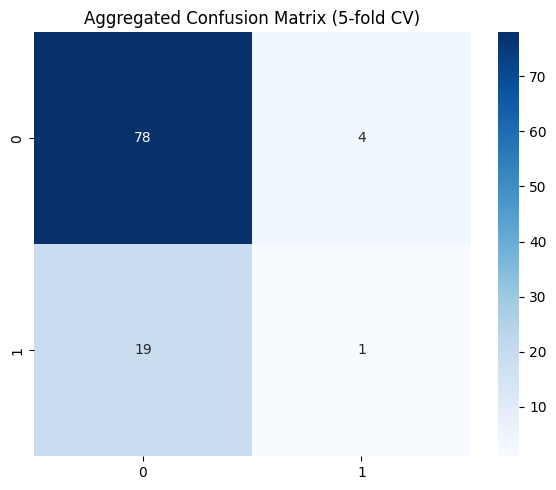

In [23]:
# RFECV pipeline
# from pathlib import Path
# from functools import reduce
from typing import List, Dict
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from joblib import dump

from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as ImbPipeline

# from previous cells -> valid features and valid targets are provided
# ---------------- CONFIG --------------------------------------------------------------
RANDOM_STATE      = 42
USE_SMOTE         = False

N_ESTIMATORS_FS   = 25 #I just have 100 datapoints 
INNER_CV_FOLDS    = 5
RFECV_STEP        = 5
TOP_K_PRESELECT   = 1000
MIN_FEATURES_KEEP = 5
RUN_RFE_ALWAYS    = False

N_SPLITS       = 5
N_ESTIMATORS   = 25 # i just have 100 datapoints
MAX_FEATURES   = "sqrt"

# local functions
# ---------------- WEARABLE RFECV ------------------------------------------------------

def build_wearable_selector(n_feats: int):
    rf_base = RandomForestClassifier(n_estimators=N_ESTIMATORS_FS, random_state=RANDOM_STATE,
                                     class_weight="balanced", n_jobs=-1, max_features="sqrt")
    steps: List[tuple] = [("impute", SimpleImputer())]
    if TOP_K_PRESELECT and n_feats > TOP_K_PRESELECT:
        steps.append(("preselect", SelectKBest(f_classif, k=TOP_K_PRESELECT)))
    steps.append(("rfecv", RFECV(rf_base, step=RFECV_STEP, cv=GroupKFold(INNER_CV_FOLDS),
                                  # i dont need groupkFold bcz i dont have rows from the same patient
                                   scoring="balanced_accuracy", min_features_to_select=MIN_FEATURES_KEEP, n_jobs=-1)))
    return ImbPipeline(steps)

# ---------------- MODEL PIPELINE ------------------------------------------------------

def make_rf_pipeline() -> ImbPipeline:
    steps: List[tuple] = [("impute", SimpleImputer())]
    if USE_SMOTE:
        steps.append(("smote", SMOTE(random_state=RANDOM_STATE)))
    steps.append(("clf", RandomForestClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE,
                                                 class_weight="balanced", n_jobs=-1, max_features=MAX_FEATURES)))
    return ImbPipeline(steps)


# Execute
X = valid_features
y = valid_targets

sel = build_wearable_selector(X.columns.size)
sel.fit(X, y, rfecv__groups=X.index)
wear_keep = [c for c, k in zip(X.columns, sel.named_steps["rfecv"].support_) if k]

# what is the classification performance of this model?
Xs = X[wear_keep]
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
pipe = make_rf_pipeline()

metrics, cms, imps = defaultdict(list), [], []

for fold, (tr, te) in enumerate(skf.split(Xs, y), 1):
    print(f"Fold {fold}/{N_SPLITS} train counts: {y.iloc[tr].value_counts().to_dict()}")
    pipe.fit(Xs.iloc[tr], y.iloc[tr])
    if USE_SMOTE:
        print("           SMOTE strategy (target counts):", pipe.named_steps["smote"].sampling_strategy_)
    y_pred = pipe.predict(Xs.iloc[te])
    metrics["Balanced Accuracy"].append(balanced_accuracy_score(y.iloc[te], y_pred))
    metrics["Precision"].append(precision_score(y.iloc[te], y_pred, average="macro", zero_division=0))
    metrics["Recall"].append(recall_score(y.iloc[te], y_pred, average="macro", zero_division=0))
    metrics["F1"].append(f1_score(y.iloc[te], y_pred, average="macro", zero_division=0))
    cms.append(confusion_matrix(y.iloc[te], y_pred)); imps.append(pipe.named_steps["clf"].feature_importances_)

print("\n=== 5‑fold CV (mean ± SD) ===")
for m, v in metrics.items():
    print(f"{m:>18}: {np.mean(v):.3f} ± {np.std(v):.3f}")

cm = np.sum(cms, axis=0); plt.figure(figsize=(6,5)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Aggregated Confusion Matrix (5‑fold CV)"); plt.tight_layout(); 
pd.Series(np.mean(np.vstack(imps),0), index=Xs.columns).sort_values(ascending=False)


=== Evaluation with selected features ===

=== Evaluation with all features ===

=== 5‑fold CV (mean ± SD) — Selected Features ===
 Balanced Accuracy: 0.500 ± 0.059
         Precision: 0.452 ± 0.108
            Recall: 0.500 ± 0.059
                F1: 0.468 ± 0.073

=== 5‑fold CV (mean ± SD) — All Features ===
 Balanced Accuracy: 0.500 ± 0.059
         Precision: 0.452 ± 0.108
            Recall: 0.500 ± 0.059
                F1: 0.468 ± 0.073


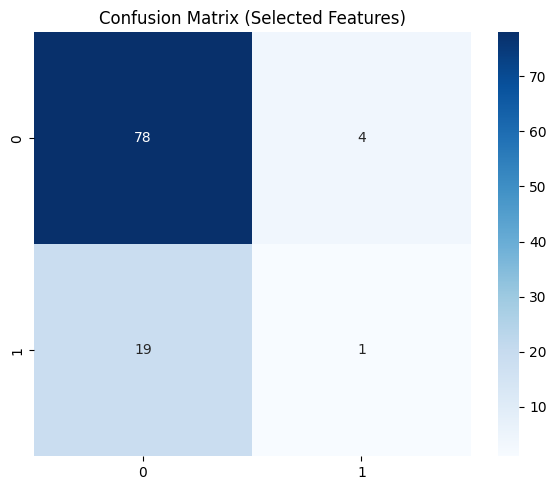

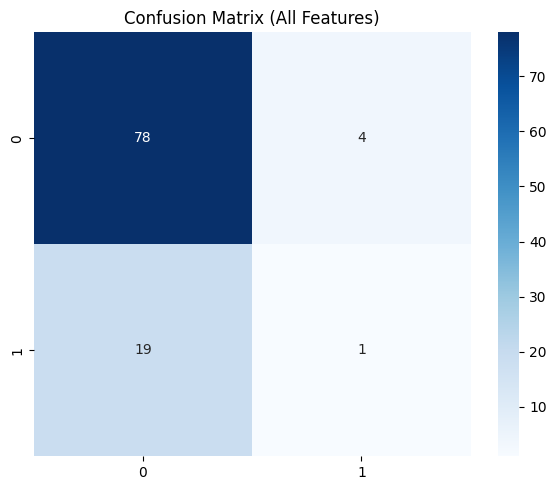

In [24]:
# === Evaluate pipe with selected features (Xs) ===
metrics_sel, cms_sel = defaultdict(list), []

print("\n=== Evaluation with selected features ===")
for fold, (tr, te) in enumerate(skf.split(Xs, y), 1):
    pipe.fit(Xs.iloc[tr], y.iloc[tr])
    y_pred = pipe.predict(Xs.iloc[te])
    y_true = y.iloc[te]

    metrics_sel["Balanced Accuracy"].append(balanced_accuracy_score(y_true, y_pred))
    metrics_sel["Precision"].append(precision_score(y_true, y_pred, average="macro", zero_division=0))
    metrics_sel["Recall"].append(recall_score(y_true, y_pred, average="macro", zero_division=0))
    metrics_sel["F1"].append(f1_score(y_true, y_pred, average="macro", zero_division=0))
    cms_sel.append(confusion_matrix(y_true, y_pred))

# === Evaluate pipe with all features (X) ===
metrics_all, cms_all = defaultdict(list), []

print("\n=== Evaluation with all features ===")
for fold, (tr, te) in enumerate(skf.split(X, y), 1):
    pipe.fit(X.iloc[tr], y.iloc[tr])
    y_pred = pipe.predict(X.iloc[te])
    y_true = y.iloc[te]

    metrics_all["Balanced Accuracy"].append(balanced_accuracy_score(y_true, y_pred))
    metrics_all["Precision"].append(precision_score(y_true, y_pred, average="macro", zero_division=0))
    metrics_all["Recall"].append(recall_score(y_true, y_pred, average="macro", zero_division=0))
    metrics_all["F1"].append(f1_score(y_true, y_pred, average="macro", zero_division=0))
    cms_all.append(confusion_matrix(y_true, y_pred))

# === Print results ===
print("\n=== 5‑fold CV (mean ± SD) — Selected Features ===")
for m, v in metrics_sel.items():
    print(f"{m:>18}: {np.mean(v):.3f} ± {np.std(v):.3f}")

print("\n=== 5‑fold CV (mean ± SD) — All Features ===")
for m, v in metrics_all.items():
    print(f"{m:>18}: {np.mean(v):.3f} ± {np.std(v):.3f}")

# === Plot confusion matrices ===
def plot_cm(cms, title):
    cm = np.sum(cms, axis=0)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.tight_layout()

plot_cm(cms_sel, "Confusion Matrix (Selected Features)")
plot_cm(cms_all, "Confusion Matrix (All Features)")

In [25]:
#Performance of classifier-continued -- dont report these bad number on just 100 patients
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, Xs, y, cv=skf, scoring='accuracy')  # or other metrics

print(f"Mean accuracy with selected features: {scores.mean():.3f} ± {scores.std():.3f}")
all_scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy')
print(f"Mean accuracy with all features: {all_scores.mean():.3f} ± {all_scores.std():.3f}")




Mean accuracy with selected features: 0.774 ± 0.062
Mean accuracy with all features: 0.774 ± 0.062


In [39]:
#repeat feature selection for full tsfresh extracted feature
#code restructured to avoid OOM
# requirement: to have run the cell previously with NON FULL feature extr

# extra step: convert stressScore bodyBattery and beatsPerMinute to hourly summaries (average)
# define hourly summaries function
def hourly_summarize(data, value_col: str, time_col: str = 'timestamp', id_col: str = 'patientid'):
    # Ensure timestamp column is in datetime format
    data[time_col] = pd.to_datetime(data[time_col])

    # Create a new column with hourly time (truncate to the hour)
    data['hour'] = data[time_col].dt.floor('H')

    # Group by patient ID and hour, then compute average
    hourly_avg = data.groupby([id_col, 'hour'])[value_col].mean().reset_index()

    # Rename column to indicate it's an hourly average
    # hourly_avg = hourly_avg.rename(columns={value_col: f'{value_col}_hourly_avg'})
    # hourly_avg = hourly_avg.drop(columns=[time_col])
    hourly_avg = hourly_avg.rename(columns={'hour': time_col})
    
    return hourly_avg

fullFLAG = True
from functools import reduce

selected_modalities = [
    ('steps_hourly', prepare_hourly_steps, parquet_dfs[1], ('id', 'time', 'value')),
    ('steps_daily', prepare_daily_steps, parquet_dfs[1], ('id', 'time', 'value')),
    ('walking_time', prepare_daily_walking_time, parquet_dfs[1], ('id', 'time', 'value')),
    ('sedentary_prop', prepare_daily_sedentary_proportion, parquet_dfs[1], ('id', 'time', 'value')),
    ('bodyBattery', lambda x: hourly_summarize(x, 'bodyBattery'), parquet_dfs[0], ('patientid', 'timestamp', 'bodyBattery')),
    ('stressScore', lambda x: hourly_summarize(x, 'stressScore'), parquet_dfs[2], ('patientid', 'timestamp', 'stressScore')),
    ('beatsPerMinute', lambda x: hourly_summarize(x, 'beatsPerMinute'), parquet_dfs[3], ('patientid', 'timestamp', 'beatsPerMinute')),
]

# Prepare target
target = sclin[['Study Subject ID', targetn]].copy()
if targetn == 'DOC_FLARE':
    target = target[sclin['Visit Occurrence'] == visit]
    target[targetn] = target[targetn].map({'Yes': 1, 'No': 0})

target.rename(columns={'Study Subject ID': 'patientid'}, inplace=True)
target['patientid'] = target['patientid'].str.lower()
target = target.set_index('patientid')
target = target[target[targetn].notna()]  # drop NaN target values

# Start with empty feature list
selected_feature_list = []

# Sequentially extract + select
for modality, prep_fn, df, (col_id, col_sort, col_val) in selected_modalities:
    print(f"\nProcessing modality: {modality}")
    
    # Prepare data
    dat = prep_fn(df.copy())
    if col_val == 'value':
        dat.rename(columns={'value': modality}, inplace=True)
        col_val = modality

    # Extract features
    custom_fc_parameters = get_fc_parameters(modality)
    if litFLAG:
        custom_fc_parameters.update(extraF)
    if fullFLAG:
        custom_fc_parameters = ComprehensiveFCParameters()

    extracted = extract_features(
        dat,
        column_id=col_id,
        column_sort=col_sort,
        column_value=col_val,
        default_fc_parameters=custom_fc_parameters,
        n_jobs=0  # safer on memory
    )
    extracted.index.name = 'patientid'
    impute(extracted)

    # Align with target
    common_ids = target.index.intersection(extracted.index)
    feat_aligned = extracted.loc[common_ids]
    targ_aligned = target.loc[common_ids, targetn]

    # Select features for this modality
    selected_feats = select_features(feat_aligned, targ_aligned, ml_task="classification")
    selected_feature_list.append(selected_feats)

# Final merged feature matrix
final_features = reduce(lambda left, right: left.join(right, how='outer'), selected_feature_list)

# Align final targets
common_ids_final = target.index.intersection(final_features.index)
final_features = final_features.loc[common_ids_final]
final_targets = target.loc[common_ids_final, targetn]

print(f"\nFinal shape: {final_features.shape}")



Processing modality: steps_hourly


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31316\1540301994.py:117: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  walking['hour'] = walking['startTime'].dt.floor('H')
Feature Extraction: 100%|██████████| 105/105 [00:06<00:00, 15.82it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['steps_hourly__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(



Processing modality: steps_daily


Feature Extraction: 100%|██████████| 105/105 [00:04<00:00, 25.21it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['steps_daily__partial_autocorrelation__lag_7'
 'steps_daily__partial_autocorrelation__lag_8'
 'steps_daily__partial_autocorrelation__lag_9'
 'steps_daily__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'steps_daily__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)'
 'steps_daily__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)'
 'steps_daily__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)'
 'steps_daily__spkt_welch_density__coeff_8'
 'steps_daily__ar_coefficient__coeff_0__k_10'
 'steps_daily__ar_coefficient__coeff_1__k_10'
 'steps_daily__ar_coefficient__coeff_2__k_10'
 'steps_daily__ar_coefficient__coeff_3__k_10'
 'steps_daily__ar_coefficient__coeff_4__k_10'
 'steps_daily__ar_coefficient__coeff_5__k_10'
 'steps_daily__ar_coefficient__coeff


Processing modality: walking_time


Feature Extraction: 100%|██████████| 105/105 [00:04<00:00, 23.85it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['walking_time__partial_autocorrelation__lag_7'
 'walking_time__partial_autocorrelation__lag_8'
 'walking_time__partial_autocorrelation__lag_9'
 'walking_time__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'walking_time__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)'
 'walking_time__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)'
 'walking_time__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)'
 'walking_time__spkt_welch_density__coeff_8'
 'walking_time__ar_coefficient__coeff_0__k_10'
 'walking_time__ar_coefficient__coeff_1__k_10'
 'walking_time__ar_coefficient__coeff_2__k_10'
 'walking_time__ar_coefficient__coeff_3__k_10'
 'walking_time__ar_coefficient__coeff_4__k_10'
 'walking_time__ar_coefficient__coeff_5__k_10'
 'walking_time__ar_coe


Processing modality: sedentary_prop


Feature Extraction: 100%|██████████| 105/105 [00:04<00:00, 23.12it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['sedentary_prop__partial_autocorrelation__lag_7'
 'sedentary_prop__partial_autocorrelation__lag_8'
 'sedentary_prop__partial_autocorrelation__lag_9'
 'sedentary_prop__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'sedentary_prop__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)'
 'sedentary_prop__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)'
 'sedentary_prop__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)'
 'sedentary_prop__spkt_welch_density__coeff_8'
 'sedentary_prop__ar_coefficient__coeff_0__k_10'
 'sedentary_prop__ar_coefficient__coeff_1__k_10'
 'sedentary_prop__ar_coefficient__coeff_2__k_10'
 'sedentary_prop__ar_coefficient__coeff_3__k_10'
 'sedentary_prop__ar_coefficient__coeff_4__k_10'
 'sedentary_prop__ar_coefficient__coeff_5__


Processing modality: bodyBattery


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31316\1711476616.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['hour'] = data[time_col].dt.floor('H')
Feature Extraction: 100%|██████████| 105/105 [00:09<00:00, 10.76it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['bodyBattery__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(



Processing modality: stressScore


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31316\1711476616.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['hour'] = data[time_col].dt.floor('H')
Feature Extraction: 100%|██████████| 104/104 [00:09<00:00, 11.35it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['stressScore__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(



Processing modality: beatsPerMinute


C:\Users\n.melanitis\AppData\Local\Temp\ipykernel_31316\1711476616.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['hour'] = data[time_col].dt.floor('H')
Feature Extraction: 100%|██████████| 104/104 [00:09<00:00, 11.29it/s]
c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['beatsPerMinute__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(



Final shape: (102, 0)


In [ ]:
# no features selected on the FULL set as well


In [66]:
# Cleaned pipeline to run RFECV pipeline on more targets

# Dependency: to the cell near the top to load features 
# (e.g. do once the feature selection for flare)


from sklearn.model_selection import  KFold
from sklearn.metrics import (
     mean_squared_error, r2_score
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import  f_regression

def prepare_targets_and_features(sclin: pd.DataFrame,
                                 targetn: str,
                                 features: pd.DataFrame,
                                 visit: str = None):
    """
    Returns aligned (features, targets) for regression or classification.

    Parameters:
    - sclin: clinical DataFrame with ['Study Subject ID', targetn, 'Visit Occurrence', ...]
    - targetn: name of the target column (e.g. 'DOC_FLARE')
    - features: DataFrame indexed by lowercase 'patientid'
    - visit: if filtering by visit is needed when targetn == 'DOC_FLARE'
    
    Returns:
    - valid_features: features aligned to non-null targets
    - valid_targets: Series of non-null targets, indexed to match features
    """
    # Copy and rename
    if targetn in ['HAQw', 'PSS']:
        if targetn == 'HAQw':
            # map values and sum
            haq_map = {
                "Without any difficulty": 0,
                "With some difficulty": 1,
                "With much difficulty": 2,
                "Unable to do": 3,
                0: 0, 1: 1, 2: 2, 3: 3  # in case already numeric
            }
            haq_cols = [
                "HAQ01SQ009",  "HAQ01SQ008"
            ]
            # Map and sum per patientid and visit
            target = sclin[["Study Subject ID", "Visit Occurrence"] + haq_cols].copy()
            for col in haq_cols:
                target[col] = target[col].map(haq_map)
            target[targetn] = target[haq_cols].sum(axis=1)

        elif targetn == 'PSS':
            # map values, invert items 4,5,7,8 and sum
            # PSS: Perceived Stress Scale, items 4,5,7,8 are reverse scored
            pss_map = {
                "0 - Never": 0,
                "1 - Rarely": 1,
                "2 - Sometimes": 2,
                "3 - Often": 3,
                "4 - Very often": 4,
                0: 0, 1: 1, 2: 2, 3: 3, 4: 4  # in case already numeric
            }
            # PSS columns, assuming order is 1-10
            pss_cols = [
                "PSS01PDPID0201", "PSS01PDPID0202", "PSS01PDPID0203", "PSS01PDPID0204", "PSS01PDPID0205",
                "PSS01PDPID0206", "PSS01PDPID0207", "PSS01PDPID0208", "PSS01PDPID0209", "PSS01PDPID0210"
            ]
            reverse_items = ["PSS01PDPID0204", "PSS01PDPID0205", "PSS01PDPID0207", "PSS01PDPID0208"]
            target = sclin[["Study Subject ID", "Visit Occurrence"] + pss_cols].copy()
            for col in pss_cols:
                target[col] = target[col].map(pss_map)
            # Reverse score specified items: new = 4 - old
            for col in reverse_items:
                target[col] = 4 - target[col]
            target[targetn] = target[pss_cols].sum(axis=1)

        # do common steps and return
        if visit is not None:
            target = target[target["Visit Occurrence"] == visit]
        target = target.rename(columns={"Study Subject ID": "patientid"})
        target["patientid"] = target["patientid"].str.lower()
        target = target.set_index("patientid")
        valid_targets = target[targetn].dropna()
        common_idx = valid_targets.index.intersection(features.index)
        valid_targets = valid_targets.loc[common_idx]
        valid_features = features.loc[common_idx]
        return valid_features, valid_targets


    target = sclin[['Study Subject ID', targetn]].copy()
    target = target[sclin['Visit Occurrence'] == visit]
    # map values if needed
    if targetn == 'DOC_FLARE':
        target[targetn] = target[targetn].map({'Yes': 1, 'No': 0})
    elif targetn == 'GRCQ01SQ001':
        # Define mapping
        value_map = {
            'UnchangedB 0': 0,
            'UnchangedΒ\xa00': 0,
            '1': 1,
            '2': 2,
            '3': 3,
            '4': 4,
            '-1': -1,
            '-2': -2,
            '-3': -3,
            '-4': -4
        }
        target[targetn] = target[targetn].map(value_map)
   #at the moment no other mappings needed

    target = target.rename(columns={'Study Subject ID': 'patientid'})
    target['patientid'] = target['patientid'].str.lower()
    target = target.set_index('patientid')

    # keep only non-null targets
    valid_targets = target[target[targetn].notna()][targetn]

    # align with features by index intersection (inner join)
    common_idx = valid_targets.index.intersection(features.index)
    valid_targets = valid_targets.loc[common_idx]
    valid_features = features.loc[common_idx]

    return valid_features, valid_targets


def build_wearable_selector_regressor(n_feats: int):
    rf_base = RandomForestRegressor(
        n_estimators=N_ESTIMATORS_FS,
        random_state=RANDOM_STATE,
        n_jobs=-1,
        max_features="sqrt"
    )
    
    steps: List[tuple] = [("impute", SimpleImputer())]
    
    if TOP_K_PRESELECT and n_feats > TOP_K_PRESELECT:
        steps.append(("preselect", SelectKBest(f_regression, k=TOP_K_PRESELECT)))
    
    steps.append((
        "rfecv",
        RFECV(
            estimator=rf_base,
            step=RFECV_STEP,
            cv=KFold(n_splits=INNER_CV_FOLDS, shuffle=True, random_state=RANDOM_STATE),
            scoring="neg_mean_squared_error",
            min_features_to_select=MIN_FEATURES_KEEP,
            n_jobs=-1
        )
    ))
    
    return ImbPipeline(steps)

def make_rf_pipeline_regress() -> ImbPipeline:
    steps: List[tuple] = [("impute", SimpleImputer())]
    if USE_SMOTE:
        steps.append(("smote", SMOTE(random_state=RANDOM_STATE)))
    steps.append(("clf", RandomForestRegressor(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE,
                                                  n_jobs=-1, max_features=MAX_FEATURES)))
    return ImbPipeline(steps)


def run_rfecv_modeling(valid_features: pd.DataFrame,
                       valid_targets: pd.Series,
                       is_regression: bool,
                       build_selector_fn,
                       make_rf_pipeline_fn,
                       N_SPLITS=5,
                       RANDOM_STATE=42,
                       USE_SMOTE=False):
    """
    Runs RFECV feature selection and cross-validated modeling pipeline.

    Parameters:
    - valid_features: DataFrame of input features (index: patientid)
    - valid_targets: Series of target values (index: patientid)
    - is_regression: True for regression, False for classification
    - build_selector_fn: function that returns a RFECV selector
    - make_rf_pipeline_fn: function that returns a modeling pipeline (RF + optional SMOTE etc.)
    - N_SPLITS: number of folds for CV
    - RANDOM_STATE: seed for reproducibility
    - USE_SMOTE: whether pipeline includes SMOTE (for classification)

    Returns:
    - metrics (dict), selector, selected feature names
    """

    X = valid_features
    y = valid_targets

    # --- Feature selection ---
    sel = build_selector_fn(X.shape[1])
    sel.fit(X, y, rfecv__groups=X.index)
    wear_keep = [c for c, k in zip(X.columns, sel.named_steps["rfecv"].support_) if k]
    Xs = X[wear_keep]

    # --- CV setup ---
    if is_regression:
        cv = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    else:
        cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

    pipe = make_rf_pipeline_fn()
    metrics, cms, imps = defaultdict(list), [], []

    # --- Cross-validation ---
    for fold, (tr, te) in enumerate(cv.split(Xs, y), 1):
        print(f"Fold {fold}/{N_SPLITS} train size: {len(tr)}")
        if not is_regression:
            print("    Class balance:", y.iloc[tr].value_counts().to_dict())
        
        pipe.fit(Xs.iloc[tr], y.iloc[tr])

        if USE_SMOTE and not is_regression:
            print("    SMOTE strategy:", pipe.named_steps["smote"].sampling_strategy_)

        y_pred = pipe.predict(Xs.iloc[te])

        if is_regression:
            metrics["RMSE"].append(np.sqrt(mean_squared_error(y.iloc[te], y_pred)))
            metrics["R2"].append(r2_score(y.iloc[te], y_pred))
        else:
            metrics["Balanced Accuracy"].append(balanced_accuracy_score(y.iloc[te], y_pred))
            metrics["Precision"].append(precision_score(y.iloc[te], y_pred, average="macro", zero_division=0))
            metrics["Recall"].append(recall_score(y.iloc[te], y_pred, average="macro", zero_division=0))
            metrics["F1"].append(f1_score(y.iloc[te], y_pred, average="macro", zero_division=0))
            cms.append(confusion_matrix(y.iloc[te], y_pred))

        imps.append(pipe.named_steps["clf"].feature_importances_)

    # --- Print metrics summary ---
    print("\n=== {}-fold CV (mean ± SD) ===".format(N_SPLITS))
    for m, v in metrics.items():
        print(f"{m:>18}: {np.mean(v):.3f} ± {np.std(v):.3f}")

    # --- Confusion matrix ---
    if not is_regression:
        cm = np.sum(cms, axis=0)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Aggregated Confusion Matrix ({}‑fold CV)".format(N_SPLITS))
        plt.tight_layout()
        plt.show()

    # --- Return results ---
    avg_importance = pd.Series(np.mean(np.vstack(imps), axis=0), index=Xs.columns).sort_values(ascending=False)
    return metrics, sel, wear_keep, avg_importance

#-----------EXAMPLE USAGE------------------------------------------------------------
#sclin, features available
N_ESTIMATORS = 200
N_ESTIMATORS_FS =200
testregrn = 'DAPSA_Score'
is_regression = True
visitn = 'T0'
# use build_wearable_selector_regressor for regression
# build werable selector made for regression
# 

valid_featuresT, valid_targetsT = prepare_targets_and_features(
    sclin=sclin,
    targetn=testregrn, 
    features=features, 
    visit=visitn)

metrics, selector, selected_features, importance_scores = run_rfecv_modeling(
    valid_features=valid_featuresT,
    valid_targets=valid_targetsT,
    is_regression=is_regression,  
    build_selector_fn=build_wearable_selector if not is_regression else build_wearable_selector_regressor,
    make_rf_pipeline_fn=make_rf_pipeline if not is_regression else make_rf_pipeline_regress,
    USE_SMOTE=False
)

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 43
Fold 2/5 train size: 43
Fold 3/5 train size: 43
Fold 4/5 train size: 43
Fold 5/5 train size: 44

=== 5-fold CV (mean ± SD) ===
              RMSE: 54.552 ± 9.997
                R2: -0.499 ± 0.964



Processing target: MDA
Fold 1/5 train size: 52
    Class balance: {0.0: 27, 1.0: 25}
Fold 2/5 train size: 52
    Class balance: {0.0: 27, 1.0: 25}
Fold 3/5 train size: 52
    Class balance: {1.0: 26, 0.0: 26}
Fold 4/5 train size: 52
    Class balance: {1.0: 26, 0.0: 26}
Fold 5/5 train size: 52
    Class balance: {1.0: 26, 0.0: 26}

=== 5-fold CV (mean ± SD) ===
 Balanced Accuracy: 0.688 ± 0.143
         Precision: 0.693 ± 0.142
            Recall: 0.688 ± 0.143
                F1: 0.684 ± 0.144


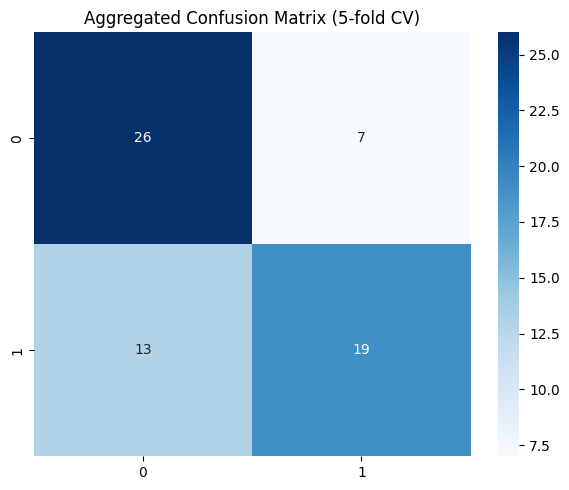

Selected features for MDA: ['steps_daily__variance', 'steps_daily__standard_deviation', 'sedentary_prop__variance', 'bodyBattery__linear_trend__attr_"slope"', 'bodyBattery__linear_trend__attr_"rvalue"']
Importance scores for MDA:
bodyBattery__linear_trend__attr_"rvalue"    0.229323
steps_daily__standard_deviation             0.201622
steps_daily__variance                       0.194499
bodyBattery__linear_trend__attr_"slope"     0.190794
sedentary_prop__variance                    0.183762
dtype: float64

Processing target: DAPSA


c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 43
Fold 2/5 train size: 43
Fold 3/5 train size: 43
Fold 4/5 train size: 43
Fold 5/5 train size: 44

=== 5-fold CV (mean ± SD) ===
              RMSE: 54.552 ± 9.997
                R2: -0.499 ± 0.964
Selected features for DAPSA: ['steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__variance', 'steps_daily__standard_deviation', 'walking_time__variance', 'walking_time__standard_deviation', 'sedentary_prop__variance', 'bodyBattery__sum_values', 'bodyBattery__mean', 'bodyBattery__linear_trend__attr_"slope"', 'bodyBattery__linear_trend__attr_"rvalue"', 'stressScore__mean']
Importance scores for DAPSA:
bodyBattery__linear_trend__attr_"rvalue"        0.094263
steps_hourly__standard_deviation                0.092830
steps_hourly__variance                          0.092345
stressScore__mean                           

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 48
Fold 2/5 train size: 48
Fold 3/5 train size: 48
Fold 4/5 train size: 48
Fold 5/5 train size: 48

=== 5-fold CV (mean ± SD) ===
              RMSE: 1.360 ± 0.234
                R2: 0.007 ± 0.251
Selected features for PASDAS: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__variance', 'walking_time__standard_deviation', 'sedentary_prop__variance', 'bodyBattery__mean', 'bodyBattery__variance', 'bodyBattery__standard_deviation', 'bodyBattery__linear_trend__attr_"rvalue"', 'stressScore__mean', 'stressScore__linear_trend__attr_"intercept"']
Importance scores for PASDAS:
steps_hourly__standard_deviation             

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 63
Fold 2/5 train size: 63
Fold 3/5 train size: 63
Fold 4/5 train size: 63
Fold 5/5 train size: 64

=== 5-fold CV (mean ± SD) ===
              RMSE: 0.655 ± 0.065
                R2: -0.140 ± 0.111
Selected features for HAQ: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop_

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 62
Fold 2/5 train size: 62
Fold 3/5 train size: 62
Fold 4/5 train size: 63
Fold 5/5 train size: 63

=== 5-fold CV (mean ± SD) ===
              RMSE: 2.439 ± 0.312
                R2: -0.083 ± 0.095
Selected features for Pain: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 62
Fold 2/5 train size: 62
Fold 3/5 train size: 62
Fold 4/5 train size: 63
Fold 5/5 train size: 63

=== 5-fold CV (mean ± SD) ===
              RMSE: 2.845 ± 0.392
                R2: -0.205 ± 0.195
Selected features for Fatigue: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_p

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 62
Fold 2/5 train size: 62
Fold 3/5 train size: 62
Fold 4/5 train size: 63
Fold 5/5 train size: 63

=== 5-fold CV (mean ± SD) ===
              RMSE: 2.204 ± 0.240
                R2: -0.003 ± 0.077
Selected features for Functional: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop__median', 'sedentary_prop__variance', 'bodyBattery__standard_deviation', 'bodyBattery__linear_trend__attr_"intercept"', 'bodyBattery__linear_trend__attr_"rvalue"', 'stressS

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 62
Fold 2/5 train size: 62
Fold 3/5 train size: 62
Fold 4/5 train size: 63
Fold 5/5 train size: 63

=== 5-fold CV (mean ± SD) ===
              RMSE: 2.649 ± 0.297
                R2: -0.233 ± 0.185
Selected features for Sleep: ['steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'sedentary_prop__median', 'sedentary_prop__variance', 'bodyBattery__sum_values', 'bodyBattery__linear_trend__attr_"intercept"', 'bodyBattery__linear_trend__attr_"slope"', 'bodyBattery__linear_trend__attr_"rvalue"', 'stressScore__sum_values'

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 84
Fold 2/5 train size: 84
Fold 3/5 train size: 84
Fold 4/5 train size: 84
Fold 5/5 train size: 84

=== 5-fold CV (mean ± SD) ===
              RMSE: 2.953 ± 0.219
                R2: -0.186 ± 0.104
Selected features for Stiff: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop__median', 'sedentary_prop__variance', 'bodyBattery__sum_values', 'bodyBattery__mean', 'bodyBattery__varian

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 62
Fold 2/5 train size: 62
Fold 3/5 train size: 62
Fold 4/5 train size: 63
Fold 5/5 train size: 63

=== 5-fold CV (mean ± SD) ===
              RMSE: 1.837 ± 0.273
                R2: -0.501 ± 0.305
Selected features for GRCQ: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__mean', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"slope"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__mean', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 84
Fold 2/5 train size: 84
Fold 3/5 train size: 84
Fold 4/5 train size: 84
Fold 5/5 train size: 84

=== 5-fold CV (mean ± SD) ===
              RMSE: 7.451 ± 1.077
                R2: -0.032 ± 0.252
Selected features for PSS: ['steps_hourly__mean', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__sum_values', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'sedentary_prop__variance', 'bodyBattery__variance', 'bodyBattery__standard_deviation', 'bodyBattery__linear_trend__attr_"rvalue"']
Importance scores for PSS:
steps_hourly__mean                              0.139292
walking_time__linear_trend__attr_"intercept"    0.114968
steps_daily__standard_deviation                 0.100146
bodyBattery__linear_trend__attr_"rvalue"        0.096171
steps_daily__linear_trend__attr_"rvalue"        0.095857
walking_time__sum_values                        0.093299
sedentary_prop__variance              

c:\Users\n.melanitis\Documents\GitHub\ADM-dev1\admJupy\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Fold 1/5 train size: 84
Fold 2/5 train size: 84
Fold 3/5 train size: 84
Fold 4/5 train size: 84
Fold 5/5 train size: 84

=== 5-fold CV (mean ± SD) ===
              RMSE: 1.352 ± 0.137
                R2: -0.358 ± 0.291
Selected features for HAQw: ['steps_hourly__mean', 'steps_hourly__variance', 'steps_hourly__standard_deviation', 'steps_hourly__linear_trend__attr_"intercept"', 'steps_hourly__linear_trend__attr_"slope"', 'steps_hourly__linear_trend__attr_"rvalue"', 'steps_daily__sum_values', 'steps_daily__variance', 'steps_daily__standard_deviation', 'steps_daily__linear_trend__attr_"intercept"', 'steps_daily__linear_trend__attr_"rvalue"', 'walking_time__variance', 'walking_time__standard_deviation', 'walking_time__linear_trend__attr_"intercept"', 'walking_time__linear_trend__attr_"slope"', 'walking_time__linear_trend__attr_"rvalue"', 'sedentary_prop__mean', 'sedentary_prop__median', 'sedentary_prop__variance', 'bodyBattery__sum_values', 'bodyBattery__mean', 'bodyBattery__variance', 'b

In [ ]:
# a loop for all the targets
outnamel = ['MDA', 'DAPSA','PASDAS','HAQ', 'Pain','Fatigue','Functional', 'Sleep', 'Stiff','GRCQ', 'PSS','HAQw']
colnamel = [
    'MDA_Score',
    'DAPSA_Score',
    'PASDAS',
    'Overall HAQ Score',
    'PSAID01PSAID01SQ1',
    'PSAID03PSAID03SQ1',
    'PSAID05PSAID05SQ1',
    'PSAID07PSAID07SQ1',
    'PAT_STIF_H',
    'GRCQ01SQ001',
	'PSS',
	'HAQw'
]
is_regressionl = [False, True, True, True, True, True, True, True, True, True, True, True]
for (outname, testregrn, is_regression) in zip(outnamel, colnamel, is_regressionl):
    print(f"\nProcessing target: {outname}")
    
    valid_featuresT, valid_targetsT = prepare_targets_and_features(
        sclin=sclin,
        targetn=testregrn, 
        features=features, 
        visit=visitn)

    metrics, selector, selected_features, importance_scores = run_rfecv_modeling(
        valid_features=valid_featuresT,
        valid_targets=valid_targetsT,
        is_regression=is_regression,  
        build_selector_fn=build_wearable_selector if not is_regression else build_wearable_selector_regressor,
        make_rf_pipeline_fn=make_rf_pipeline if not is_regression else make_rf_pipeline_regress,
        USE_SMOTE=False
    )
    
    # Save results or do further processing as needed
    print(f"Selected features for {outname}: {selected_features}")
    print(f"Importance scores for {outname}:\n{importance_scores}")

In [62]:
print(sclin['GRCQ01SQ001'].unique())

['4' 'UnchangedB 0' '3' '1' 'UnchangedΒ\xa00' '2' '-1' '-2' '-3' nan '-4']


In [72]:
# Time to turn feature extraction into a function and revisit it
# selection of features with targets is done in another function
# already defined above- prepare_targets_and_features--
# now i want to produce the extracted features passed to this function

# CHANGED in feature extraction: get daily summaries for bodyBattery, stressScore, and beatsPerMinute
# drop hourly steps
# the tsfresh features on hourly and minute-by-minute data make no sense and are dropped


from functools import reduce
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from sklearn.impute import SimpleImputer

def daily_summarize(data, value_col: str, time_col: str = 'timestamp', id_col: str = 'patientid'):
    # Ensure timestamp column is in datetime format
    data[time_col] = pd.to_datetime(data[time_col])

    # Create a new column with hourly time (truncate to the hour)
    data['hour'] = data[time_col].dt.floor('D')

    # Group by patient ID and hour, then compute average
    hourly_avg = data.groupby([id_col, 'hour'])[value_col].mean().reset_index()

    # Rename column to indicate it's an hourly average
    # hourly_avg = hourly_avg.rename(columns={value_col: f'{value_col}_hourly_avg'})
    # hourly_avg = hourly_avg.drop(columns=[time_col])
    hourly_avg = hourly_avg.rename(columns={'hour': time_col})
    
    return hourly_avg

def extract_two_week_features(
    tupsVarNames: list,
    spats_csv: str,
    cdata_csv: str,
    capturedData: str,
    litFLAG=False,
    fullFLAG=False,
    impute_flag=True,
) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Extracts wearable features over a two-week window per patient, with optional imputation.

    Returns:
    - features: pd.DataFrame of extracted features (index=patientid)
    - sclin: clinical data aligned with patients
    - spat: selected patient registration data
    """
    extraF = {
        "minimum": None,
        "maximum": None,
        "mean_change": None,
        "mean_abs_change": None,
        "change_quantiles": [
            {"ql": 0.0, "qh": 0.5, "isabs": True, "f_agg": "mean"}  # approximates 2nd-order diff
            ]
    #add the other selected features, extract for all modalities
    }
    # Load patient selection file
    rawp = pd.read_excel(spats_csv, header=None)
    rawp = rawp[0].str.split(',', expand=True)
    rawp.columns = rawp.iloc[0]
    rawp = rawp[1:]
    spat = rawp[['patientid', 'final_register_date']].copy()
    spat['final_register_date'] = pd.to_datetime(spat['final_register_date'])
    ids_to_match = rawp['patientid'].astype(str).str.lower()

    # Load wearable data
    parquet_dfs = []
    for collection, feature in tupsVarNames:
        fname = f"Mar29_{collection}"
        df = readParts(fname, ids_to_match, capturedData)
        df['modality'] = feature
        df['collection'] = collection
        parquet_dfs.append(df)
        print(f"Loaded {fname} with shape {df.shape}")

    # Filter data to 2-week window from registration
    for i, df in enumerate(parquet_dfs):
        df = df.merge(spat, on='patientid', how='inner')
        try:
            df = df[
                (df['timestamp'] >= df['final_register_date']) &
                (df['timestamp'] < df['final_register_date'] + pd.Timedelta(weeks=2))
            ]
        except KeyError:
            df = df[
                (df['startTime'] >= df['final_register_date']) &
                (df['startTime'] < df['final_register_date'] + pd.Timedelta(weeks=2))
            ]
        parquet_dfs[i] = df

    # Load and filter clinical data
    rawc = pd.read_csv(cdata_csv)
    study_ids = rawc['Study Subject ID'].astype(str).str.lower()
    sclin = rawc[study_ids.isin(ids_to_match)]

    # Prepare feature-specific DataFrames
    # hourly_steps_df = prepare_hourly_steps(parquet_dfs[1])
    daily_steps_df = prepare_daily_steps(parquet_dfs[1])
    daily_walking_time_df = prepare_daily_walking_time(parquet_dfs[1])
    daily_sedentary_prop_df = prepare_daily_sedentary_proportion(parquet_dfs[1])
    daily_bdb = daily_summarize(parquet_dfs[0], 'bodyBattery')
    daily_stress = daily_summarize(parquet_dfs[2], 'stressScore')
    daily_bpm = daily_summarize(parquet_dfs[3], 'beatsPerMinute')
    mname = [#'steps_hourly', 
             'steps_daily', 'walking_time', 'sedentary_prop', 'other', 'other', 'other']
    efconfig = [
        # ('id', 'time', 'value'),
        ('id', 'time', 'value'),
        ('id', 'time', 'value'),
        ('id', 'time', 'value'),
        ('patientid', 'timestamp', 'bodyBattery'),
        ('patientid', 'timestamp', 'stressScore'),
        ('patientid', 'timestamp', 'beatsPerMinute')
    ]
    data = [
        # hourly_steps_df,
        daily_steps_df,
        daily_walking_time_df,
        daily_sedentary_prop_df,
        daily_bdb,
        daily_stress,
        daily_bpm
    ]

    # Extract tsfresh features
    flist = []
    for mod, cfg, dat in zip(mname, efconfig, data):
        custom_fc_parameters = get_fc_parameters(mod)
        if litFLAG:
            custom_fc_parameters.update(extraF)
        if fullFLAG:
            custom_fc_parameters = ComprehensiveFCParameters()
        if cfg[2] == 'value':
            cfg = (cfg[0], cfg[1], mod)
            dat.rename(columns={'value': mod}, inplace=True)

        extracted = extract_features(
            dat,
            column_id=cfg[0],
            column_sort=cfg[1],
            column_value=cfg[2],
            default_fc_parameters=custom_fc_parameters
        )
        extracted.index.name = 'patientid'
        flist.append(extracted)

    # Merge extracted features
    features = reduce(lambda left, right: left.join(right, how='outer'), flist)

    # Optional imputation
    if impute_flag:
        print("Imputing missing values...")
        imp = SimpleImputer(strategy='mean')
        features.iloc[:, :] = imp.fit_transform(features)

    return features, sclin, spat


Loaded Mar29_bodybattery with shape (25449068, 5)
Loaded Mar29_wellness with shape (21430352, 7)
Loaded Mar29_stresslevels with shape (25689029, 5)
Loaded Mar29_heartratereadings with shape (27179359, 5)


Feature Extraction: 100%|██████████| 26/26 [00:04<00:00,  6.20it/s]


Imputing missing values...
Fold 1/5 - Class balance: {0.0: 65, 1.0: 16}
Fold 2/5 - Class balance: {0.0: 65, 1.0: 16}
Fold 3/5 - Class balance: {0.0: 66, 1.0: 16}
Fold 4/5 - Class balance: {0.0: 66, 1.0: 16}
Fold 5/5 - Class balance: {0.0: 66, 1.0: 16}

=== Elastic Net Logistic Regression: 5-fold CV (mean ± SD) ===
 Balanced Accuracy: 0.497 ± 0.118
         Precision: 0.500 ± 0.126
            Recall: 0.497 ± 0.118
                F1: 0.488 ± 0.117


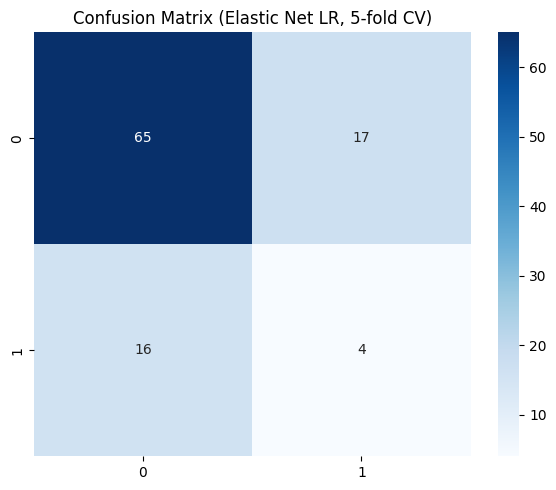


=== Selected Features by Elastic Net Logistic Regression ===
                                              feature  coefficient
11  steps_daily__change_quantiles__f_agg_"mean"__i...    -0.678093
37        bodyBattery__linear_trend__attr_"intercept"    -0.601209
20                              walking_time__maximum     0.443538
64                            beatsPerMinute__minimum     0.393369
31                    sedentary_prop__mean_abs_change    -0.381753
50            stressScore__linear_trend__attr_"slope"    -0.276288
65                            beatsPerMinute__maximum     0.258942
66                        beatsPerMinute__mean_change     0.254922
5             steps_daily__linear_trend__attr_"slope"     0.185195
56  stressScore__change_quantiles__f_agg_"mean"__i...    -0.179224
35                              bodyBattery__variance     0.136815
43                       bodyBattery__mean_abs_change     0.131209
18          walking_time__linear_trend__attr_"rvalue"     0.097129


In [78]:
# Prediction - LOGISTIC REGRESSION WITH ELASTIC NET
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    balanced_accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def run_elastic_logr(valid_features: pd.DataFrame,
                     valid_targets: pd.Series,
                     n_splits: int = 5,
                     random_state: int = 42):
    """
    Runs Elastic Net Logistic Regression with cross-validation.

    Parameters:
    - valid_features: pd.DataFrame of shape (n_samples, n_features)
    - valid_targets: pd.Series of binary labels
    - n_splits: number of CV folds
    - random_state: random seed

    Returns:
    - metrics: dict of CV metrics
    - final_model: trained logistic regression model
    """

    # --- Pipeline ---
    pipe = Pipeline([
        ("impute", SimpleImputer()),  # mean imputation
        ("scale", StandardScaler()),  # scaling is required for ElasticNet
        ("clf", LogisticRegressionCV(
            Cs=10,
            cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state),
            penalty='elasticnet',
            solver='saga',
            l1_ratios=[.1, .5, .9],
            scoring='balanced_accuracy',
            max_iter=5000,
            n_jobs=-1,
            random_state=random_state
        ))
    ])

    # --- Cross-validation ---
    X = valid_features
    y = valid_targets
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics = defaultdict(list)
    cms = []

    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
        print(f"Fold {fold}/{n_splits} - Class balance:", y.iloc[train_idx].value_counts().to_dict())
        pipe.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred = pipe.predict(X.iloc[test_idx])

        metrics["Balanced Accuracy"].append(balanced_accuracy_score(y.iloc[test_idx], y_pred))
        metrics["Precision"].append(precision_score(y.iloc[test_idx], y_pred, average="macro", zero_division=0))
        metrics["Recall"].append(recall_score(y.iloc[test_idx], y_pred, average="macro", zero_division=0))
        metrics["F1"].append(f1_score(y.iloc[test_idx], y_pred, average="macro", zero_division=0))
        cms.append(confusion_matrix(y.iloc[test_idx], y_pred))

    # --- Summary ---
    print("\n=== Elastic Net Logistic Regression: {}-fold CV (mean ± SD) ===".format(n_splits))
    for m, v in metrics.items():
        print(f"{m:>18}: {np.mean(v):.3f} ± {np.std(v):.3f}")

    # --- Confusion Matrix ---
    cm = sum(cms)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Elastic Net LR, {}-fold CV)".format(n_splits))
    plt.tight_layout()
    plt.show()

    # --- Final model trained on all data ---
    pipe.fit(X, y)
    return metrics, pipe

# Example usage
ffeatures, ssclin, sspat = extract_two_week_features(
    tupsVarNames,
    spats_csv,
    cdata_csv,
    capturedData,
    litFLAG=True,
    fullFLAG=False,
    impute_flag=True,
)
valid_featuresT, valid_targetsT = prepare_targets_and_features(sclin=ssclin,
                                                               targetn='DOC_FLARE',
                                                               features=ffeatures,
                                                               visit='T0' )
metrics, final_model = run_elastic_logr(
    valid_features=valid_featuresT,
    valid_targets=valid_targetsT,
    n_splits=5,
    random_state=42)

# After running:
# metrics, final_model = run_elastic_logr(...)

# Access fitted logistic regression model
logr = final_model.named_steps["clf"]

# Get feature names and coefficients
feature_names = valid_featuresT.columns
coefs = logr.coef_[0]  # shape: (1, n_features) for binary

# Create a DataFrame for inspection
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
})

# Filter non-zero (selected) features
selected_features_df = coef_df[coef_df["coefficient"] != 0].sort_values(by="coefficient", key=abs, ascending=False)

# Display
print("\n=== Selected Features by Elastic Net Logistic Regression ===")
print(selected_features_df)


In [77]:
ffeatures

(           steps_daily__sum_values  steps_daily__mean  steps_daily__variance  \
 patientid                                                                      
 p1010001                   84227.0        6479.000000           5.659430e+06   
 p1020001                  125042.0        8931.571429           1.700754e+07   
 p1020002                      49.0          49.000000           0.000000e+00   
 p1020005                  102001.0        7285.785714           1.003163e+07   
 p1020006                   74749.0        5339.214286           3.515787e+06   
 ...                            ...                ...                    ...   
 p4010046                   75523.0        8391.444444           2.814608e+07   
 p4010047                   36949.0        4105.444444           3.655344e+06   
 p4010048                  114770.0        8197.857143           3.773680e+06   
 p4010049                   88981.0        6355.785714           3.887233e+06   
 p4010050                   